# Pre-Parcial - Taller en Python: Series de Tiempo, Joins, Visualización, Pivot Tables, y Storytelling (100 Puntos)

### CORRA LA SIGUIENTE LINEA SOLO UNA VEZ

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
!unzip europe_players.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Match.csv.zip
!unzip Match.csv.zip

--2024-10-27 23:49:54--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip [following]
--2024-10-27 23:49:55--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4840920 (4.6M) [application/zip]
Saving to: ‘europe_players.zip’

europe_players.zip  100%[===================>]   4.62M  18.6MB/s    in 0.2s    

2024-10-27 23:49:57 (18.6

##Parte 1: Exploración Inicial de los Datos y Análisis de Medias (20 Puntos)


1.1 Cargar y Unir Tablas (10 Puntos)
Empezamos cargando las tablas y uniéndolas para facilitar el análisis. En esta etapa se enfoca en unir la tabla de partidos con la de equipos y atributos.

Base de Datos:
Las tablas disponibles son:

*   Country (11 filas, 2 columnas)
*   League (11 filas, 3 columnas)
*   Match (25,979 filas, 115 columnas)
*   Player (11,060 filas, 7 columnas)
*   Player_Attributes (183,978 filas, 42 columnas)
*   Team (299 filas, 5 columnas)
*   Team_Attributes (1,458 filas, 25 columnas)

In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)
# Cargar tablas
Match = pd.read_csv("Match.csv")
Team = pd.read_csv("Team.csv")
Team_Attributes = pd.read_csv("Team_Attributes.csv")

# Unir tablas para obtener el nombre de los equipos locales y visitantes
Team_complete = pd.merge(Team_Attributes, Team, how="outer", on="team_api_id")

# Unir atributos del equipo a la tabla de partidos
data = pd.merge(Team_complete, Match, how="outer", left_on="team_api_id", right_on= "home_team_api_id" )
# Mostrar las primeras filas para verificar


In [34]:
data.head()

,id_x,team_fifa_api_id_x,team_api_id,date_x,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name,id,country_id,league_id,season,stage,date_y,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1113.0,874.0,1601,2010-02-22 00:00:00,30.0,Slow,NaN,Little,40.0,Mixed,Organised,50.0,Normal,35.0,Normal,70.0,Lots,Organised,65.0,Medium,60.0,Press,50.0,Normal,Cover,31446,874.0,Ruch Chorzów,CHO,15746,15722,15722,2008/2009,12,2008-11-08 00:00:00,506621,1601,8322,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1113.0,874.0,1601,2010-02-22 00:00:00,30.0,Slow,NaN,Little,40.0,Mixed,Organised,50.0,Normal,35.0,Normal,70.0,Lots,Organised,65.0,Medium,60.0,Press,50.0,Normal,Cover,31446,874.0,Ruch Chorzów,CHO,15754,15722,15722,2008/2009,13,2008-11-11 00:00:00,506533,1601,8025,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1113.0,874.0,1601,2010-02-22 00:00:00,30.0,Slow,NaN,Little,40.0,Mixed,Organised,50.0,Normal,35.0,Normal,70.0,Lots,Organised,65.0,Medium,60.0,Press,50.0,Normal,Cover,31446,874.0,Ruch Chorzów,CHO,15770,15722,15722,2008/2009,15,2008-11-21 00:00:00,506637,1601,8673,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1113.0,874.0,1601,2010-02-22 00:00:00,30.0,Slow,NaN,Little,40.0,Mixed,Organised

Pregunta de Negocio:

¿Cómo afecta la localía o el hecho de ser visitante en el rendimiento de los equipos? ¿Cuáles son los equipos que tienden a ganar más en casa o fuera de ella?

**RTA:** Los equipos tienden a ganar muchos más partidos cuando son locales que cuando juegan de visitantes. El ánimo y motivación siendo local es mayor que cuando se juega de visitante.

Los equipos que más ganan de local son el Real Madrid FC y el FC Barcelona. Los equipos que más ganan de visitante son el Kilmarnock y FC Zürich.

In [4]:
home_win = data.groupby(["home_team_api_id", "team_long_name"])['home_team_goal'].sum()
away_win = data.groupby(["away_team_api_id", "team_long_name"])['away_team_goal'].sum()

team_win = pd.DataFrame({'home_wins': home_win, 'away_wins': away_win})

team_win['win_diff'] = team_win['home_wins'] - team_win['away_wins']

team_win = team_win.sort_values('win_diff', ascending=False)

team_win.sort_values(by="home_wins", ascending= False).head(5)

,,home_wins,away_wins,win_diff
,team_long_name,,,
8633,Real Madrid CF,3030.0,NaN,NaN
8634,FC Barcelona,2970.0,NaN,NaN
9925,Celtic,2334.0,NaN,NaN
9823,FC Bayern Munich,2292.0,NaN,NaN
8640,PSV,2220.0,NaN,NaN


In [5]:
team_win.sort_values(by="away_wins", ascending= False).head(5)

,,home_wins,away_wins,win_diff
,team_long_name,,,
9925,Kilmarnock,NaN,228.0,NaN
9931,FC Zürich,NaN,210.0,NaN
9925,Dundee United,NaN,192.0,NaN
9931,FC Luzern,NaN,180.0,NaN
9925,Motherwell,NaN,180.0,NaN


1.2 Análisis de Medias (10 Puntos)
Antes de realizar análisis complejos, obtenemos algunas estadísticas descriptivas que nos den una visión general de los datos. Calculemos las medias de goles en casa y fuera de casa.

In [6]:
# Calcular la media de goles locales y visitantes

average_home_goal = data['home_team_goal'].mean()
average_away_goal = data['away_team_goal'].mean()

# Mostrar resultados
print(f"Average home goals: {average_home_goal:.2f}")
print(f"Average away goals: {average_away_goal:.2f}")

print("En promedio, los equipos meten más goles jugando de local que de visitante")

Average home goals: 1.57
Average away goals: 1.14
En promedio, los equipos meten más goles jugando de local que de visitante


Pregunta de Negocio:

¿Qué implicaciones tiene el hecho de que la media de goles locales sea mayor o menor que la de visitantes? ¿Cómo puede afectar esto las decisiones tácticas y estrategias de los equipos?

Los equipos meten más goles de locales que de visitantes. Esto significa que los estrategas de los equipos deben enfocarse en hacer tácticas defensivas cuando están de visitantes y tácticas ofensivas cuando son locales. La ventaja del local aumenta la confianza y la agresividad del equipo en el ataque.

##Parte 2: Series de Tiempo y Tendencias Temporales (20 Puntos)


2.1 Análisis de Tendencias Temporales (10 Puntos)
Convertimos la columna de fechas en un formato de tiempo y analizamos la evolución de los goles anotados por temporada, tanto locales como visitantes. Esto ayudará a detectar si hay fluctuaciones en el rendimiento a lo largo del tiempo.

In [7]:
# Convertir la columna de fechas
data["date_x"] = pd.to_datetime(data["date_x"])
data["season"] = data["date_x"].dt.year
# Agrupar goles por temporada y calcular el total de goles locales y visitantes
goals_per_season =data.groupby("season").agg({"home_team_goal": "sum", "away_team_goal": "sum"})

# Mostrar los resultados
print("Evolución de goles por temporada:")
print(goals_per_season)

Evolución de goles por temporada:
        home_team_goal  away_team_goal
season                                
2010.0           37084           26803
2011.0           37415           27156
2012.0           37214           26918
2013.0           37522           27093
2014.0           37392           26968
2015.0           37023           26775


**RTA**: La cantidad de goles hechos por los equipos locales y visitantes no varía de forma significativa de una temporada a otra.

Pregunta de Negocio:

¿Cómo varía el número de goles anotados en diferentes temporadas? ¿Existen picos o caídas significativas que puedan estar relacionadas con cambios en la estructura de la liga o en los equipos?

**RTA**:Cada temporada los equipos meten al menos 37000 goles en casa y no superan los 37600. De visitantes, cada temporada los equipos meten entre 26000 y 27000. Esto quiere decir que no hay caídas en goles realmente significativas, esto puede cambiar es por el plantel de los equipos y sus estrategias de juego.

2.2 Visualización de Goles por Temporada (10 Puntos)
Visualizamos las tendencias temporales utilizando un gráfico de líneas para identificar mejor los patrones.

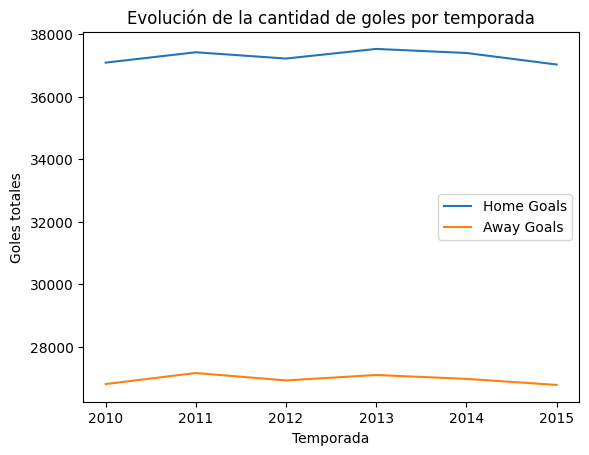

In [8]:
import matplotlib.pyplot as plt

# Gráfico de líneas para mostrar la tendencia de goles por temporada
import matplotlib.pyplot as plt

plt.plot(goals_per_season.index, goals_per_season['home_team_goal'], label='Home Goals')
plt.plot(goals_per_season.index, goals_per_season['away_team_goal'], label='Away Goals')

plt.xlabel('Temporada')
plt.ylabel('Goles totales')
plt.title('Evolución de la cantidad de goles por temporada')

plt.legend()

plt.show()

Pregunta de Negocio:

¿Cómo puede influir esta tendencia en las decisiones de los equipos para preparar una temporada? ¿Existen ciertos períodos del año donde deberían ajustar su estilo de juego?


**RTA** Lo más importante es ajustar el juego dependiendo del rival y si se juega de local o de visitante. Al ser local, el equipo tiene un estado de ánimo mayor, por esta razón se debería atacar con un estilo más agrevivo y presionar al rival desde arriba. Si se juega de visitante, es mejor jugar a la defensiva y aprovechar espacios si se abren.

##Parte 3: Análisis del Impacto de los Atributos del Equipo (20 Puntos)


3.1 Crosstab para Analizar la Relación entre Atributos y Goles (10 Puntos)
Usamos una tabla cruzada para ver si hay alguna correlación entre los atributos del equipo, como la velocidad del juego, y el número de goles anotados.

In [9]:
Total_goals= data["home_team_goal"] + data["away_team_goal"]
data["Total_goals"] = Total_goals
 # Crear una tabla cruzada para velocidad de juego y goles anotados
Velocidad_goles= pd.crosstab(data['buildUpPlaySpeedClass'], data['Total_goals'])
# Mostrar la tabla cruzada
Velocidad_goles


Total_goals,0,1,2,3,4,5,6,7,8,9,10,11,12
buildUpPlaySpeedClass,,,,,,,,,,,,,
Balanced,8652,19656,27941,24172,17488,9061,4334,1564,611,155,56,6,8
Fast,1323,3054,4257,3861,2910,1551,764,255,130,38,5,0,4
Slow,746,1830,2497,2144,1580,821,400,155,47,12,5,0,0


Pregunta de Negocio:

¿Existe alguna relación clara entre la velocidad del juego de un equipo y el número de goles que anotan? ¿Cómo podrían usar los equipos esta información para ajustar sus estrategias?

**RTA** A nivel general, no hay tanta relación entre los goles y la velocidad del equipo si se juega a altas o bajas velocidades. En cambio, si se juega de forma balanceada, aumenta la cantidad de goles hechos en el partido hasta cierto punto. En ese caso, hay una relación entre goles convertidos y juego balanceado.

Esto significa que una buena estrategia es no acelerar el juego demasiado, pero tampoco relentizarlo, lo mejor sería mantener un buen ritmo gracias al estado físico de los jugadores y analizar lo que haga el rival.

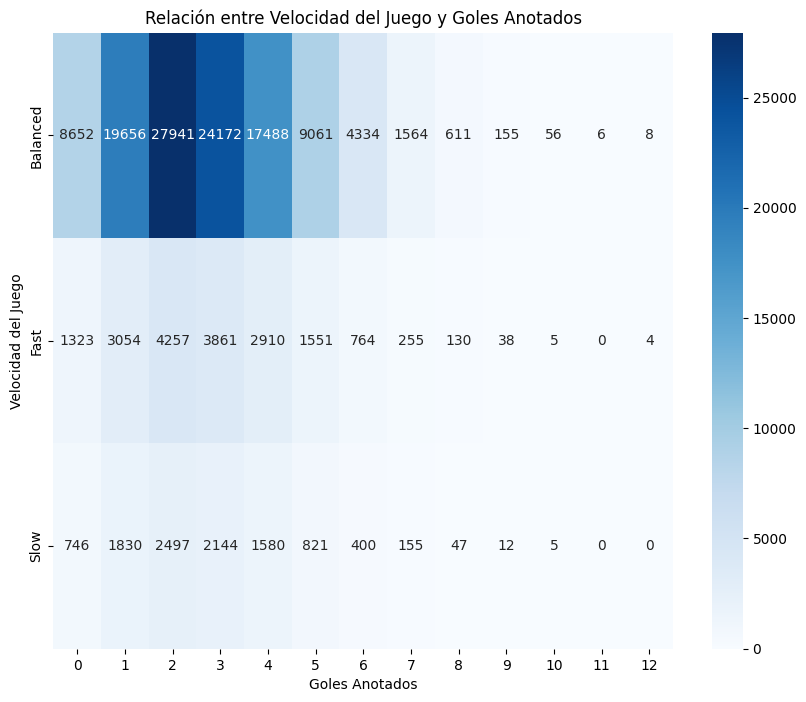

In [10]:
import seaborn as sns
correlacion = pd.crosstab(data['buildUpPlaySpeedClass'], data['Total_goals'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='Blues', fmt='g')
plt.title('Relación entre Velocidad del Juego y Goles Anotados')
plt.xlabel('Goles Anotados')
plt.ylabel('Velocidad del Juego')
plt.show()

3.2 Visualización de la Relación entre Velocidad y Goles (10 Puntos)
Creamos un gráfico de barras apiladas para representar cómo la velocidad del juego está relacionada con el número de goles anotados.

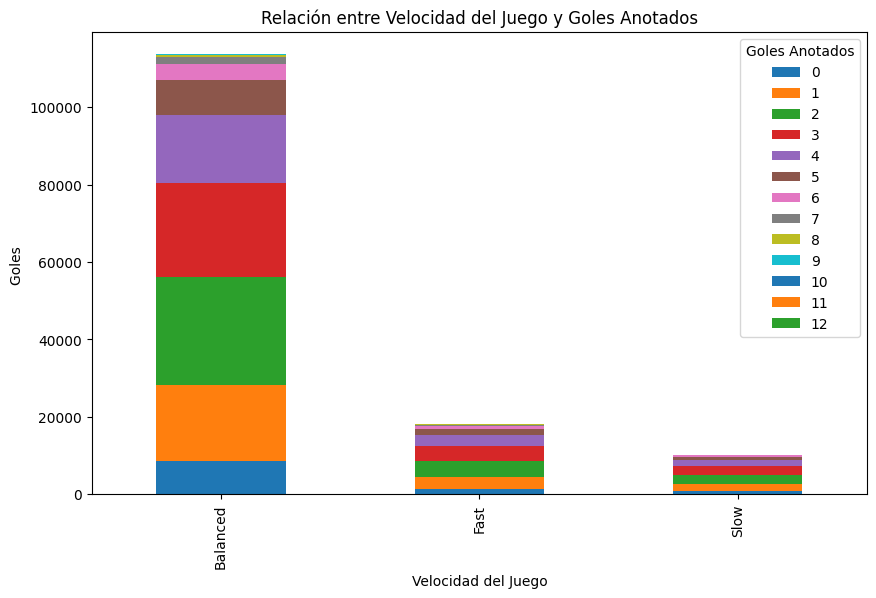

In [11]:
# Gráfico de barras apiladas para la relación entre velocidad de juego y goles
correlacion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Velocidad del Juego y Goles Anotados')
plt.xlabel('Velocidad del Juego')
plt.ylabel('Goles ')
plt.legend(title='Goles Anotados')
plt.show()

Pregunta de Negocio:

¿Cómo puede esta información influir en las decisiones tácticas? Si los equipos que juegan a alta velocidad marcan más goles, ¿deberían todos los equipos intentar jugar más rápido?

**RTA** Jugar más rápido no necesariamente va a significar que se harán más goles en el partido. La clave está en que el equipo juegue a su propio ritmo (que depende del estado físico de los jugadores) y analice muy bien las fortalezas y debilidades del rival. De esta manera se podrá saber cual camino tomar para ganar el partido.

##Parte 4: Uso de Pivot Tables para Análisis Comparativo (20 Puntos)


4.1 Pivot Table para Análisis de Goles por Temporada y Estilo de Juego (10 Puntos)
Creamos una pivot table para comparar cómo el estilo de juego de los equipos influye en el promedio de goles por temporada.

In [12]:
# Crear una pivot table para analizar goles por estilo de juego y temporada
pivot = pd.pivot_table(data, values=['home_team_goal', 'away_team_goal'], index='season', columns=['buildUpPlaySpeedClass'], aggfunc='mean')

print(pivot)
# Mostrar resultados


                      away_team_goal                     home_team_goal  \
buildUpPlaySpeedClass       Balanced      Fast      Slow       Balanced   
season                                                                    
2010.0                      1.144752  1.138128  1.116065       1.583096   
2011.0                      1.138122  1.144895  1.169417       1.560561   
2012.0                      1.157844  1.116038  0.949203       1.538073   
2013.0                      1.141017  1.141215  1.050044       1.570237   
2014.0                      1.152178  1.053165  1.054745       1.540018   
2015.0                      1.145814  1.072496  1.169118       1.551366   

                                           
buildUpPlaySpeedClass      Fast      Slow  
season                                     
2010.0                 1.583054  1.538267  
2011.0                 1.670989  1.457646  
2012.0                 1.609906  1.961607  
2013.0                 1.591544  1.608428  
2014.0          

Pregunta de Negocio:

¿Qué estilos de juego han sido más efectivos a lo largo de las temporadas? ¿Los equipos deberían adaptar su estrategia en función del tipo de juego que otros equipos han utilizado con éxito en cada temporada?


**RTA**: Dejando de lado el panorama general (goles totales en un partido), fijandonos específicamente en los goles hechos por el local y el visitante, en algunas temporadas el visitante metía más goles en promedio si jugaba de forma balanceada y el local metía más goles en promedio si jugaba lento. En otro año, se metían más goles si tanto el local como visitante jugaban rápido. Esto significa que para construir una estrategia, se puede tomar como base la estrategía del éxito de otros equipos y adaptarla a las cualidades del equipo que busca mejorar. Una estrategia que ganó en un año no necesariamente es la mejor para el año siguiente, el futbol es cambiante.

4.2 Visualización Comparativa del Estilo de Juego (10 Puntos)
Visualizamos los resultados de la pivot table utilizando un gráfico de barras apiladas para comparar los promedios de goles por temporada y estilo de juego.

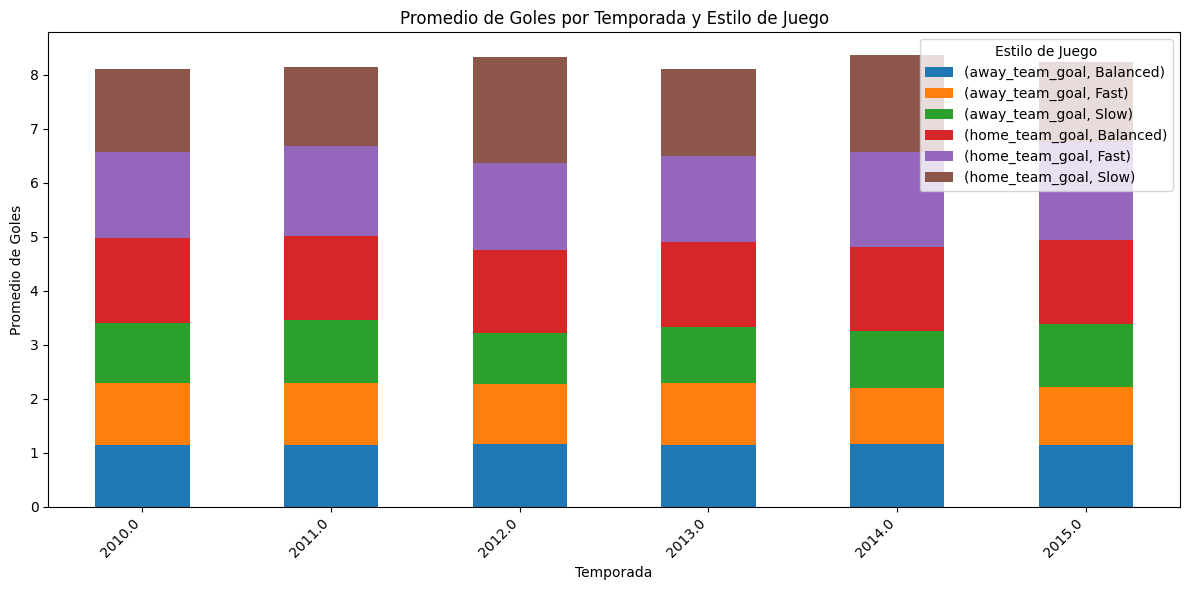

In [13]:
# Gráfico de barras apiladas para comparar estilo de juego y goles por temporada
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Promedio de Goles por Temporada y Estilo de Juego')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles')
plt.legend(title='Estilo de Juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pregunta de Negocio:

¿Cómo puede el análisis de los estilos de juego ayudar a los equipos a decidir cómo enfrentar a sus oponentes en futuras temporadas? ¿Deberían cambiar su estilo de juego según los rivales?

**RTA**:El estilo de juego debe cambiar dependiendo del rival, ya que la debilidad de un equipo puede ser la fortaleza de otro. Analizando distintos estilos de juego podemos identificar que estilos han sido determinantes para derrotar a un equipo y adaptar la estrategia en base a eso.

##Parte 5: Conclusión y Storytelling (20 Puntos)
5.1 Storytelling Basado en los Insights

Obtenidos (10 Puntos)
Con base en todos los análisis anteriores, redacta una narrativa que explique los insights obtenidos. Asegúrate de incluir cómo la tendencia de los goles y el estilo de juego de los equipos ha evolucionado con el tiempo.

Puntos a incluir en el Storytelling:

¿Qué equipos han sido los más dominantes en las últimas temporadas y por qué?
¿Cómo han cambiado los estilos de juego y cómo eso ha influido en los resultados?
¿Qué tipo de ajustes tácticos pueden hacer los equipos según los resultados de este análisis?


**RTA** Los equipos locales tienen más confianza y agresividad en su juego, lo cual los ha llevado a meter más goles en promedio que los equipos visitantes. El estilo de juego cambia ligeramente de una temporada a otra, por esa razón las tácticas deben cambiar de igual manera, de lo contrario se podrían estar cometiendo errores que pueden costar partidos. Lo que ha sido contante a lo largo de los años es que los equipos locales tienden a meter más goles que el visitante independientemente de la velocidad de juego (alta, baja o balanceada), mientras que los equipos visitantes a lo largo del tiempo han tendido ligeramente a disminuir su velocidad de juego, lo que lo ha favorecido con goles a favor. Por esta razón, los jugadores deben entrenar mucho su fisico para que cuando sean locales, jueguen con mucha velocidad y si son visitantes jueguen más lento y con control.



5.2 Conclusión y Recomendaciones Finales (10 Puntos)
Proporciona una conclusión basada en el análisis y da recomendaciones prácticas para los equipos. Considera cómo los datos analizados pueden ayudar en la toma de decisiones estratégicas, como la compra de jugadores, tácticas de juego, y preparación para futuras temporadas.

**RTA** Para futuras temporadas, se debería analizar el rendimiento de los rivales en las últimas dos temporadas (tanto sus estrategias como estadísticas dentro del juego), para que de esta manera se puedan desarrollar tácticas dentro de los partidos. También se debe tener en cuenta el plantel de jugadores con el que se cuenta, si se juega de local o visitante, el estado físico del equipo y la velocidad que se quiere manejar en el juego.
Con estos datos se prepararán mejor los jugadores y se planificarán partidos.